In [178]:
def normalize(X):
    f = X.shape[1]
    for i in range(f):
        mean = X[:,i].mean()
        std = X[:,i].std()
        if std == 0:
            std = 1
        X[:,i] = (X[:,i]-mean)/std
    
    return X

def train_test_split(X,y):
    n = X.shape[0]
    trainX = X[:n-ntest,:]
    trainy = y[:n-ntest]
    testX = X[n-ntest:,:]
    testy = y[n-ntest:]
    
    return trainX, trainy, testX, testy

def kfold(X,y,k):
    n = X.shape[0]
    nSample = int(np.ceil(n/k))
    Xfold = {}
    yfold = {}
    
    for i in range(k):
        if i!=k:
            Xfold[i] = X[i*nSample:(i+1)*nSample,:]
            yfold[i] = y[i*nSample:(i+1)*nSample]
        else:
            Xfold[i] = X[i*nSample:,:]
            yfold[i] = y[i*nSample:]
    
    return Xfold,yfold

def get_lrn_val(Xfold,yfold,i,k):
    Xval = Xfold[i]
    yval = yfold[i]
    
    m = Xfold[0].shape[1]
    Xlrn = np.empty((0,m))
    ylrn = np.empty((0,))
    for j in range(k):
        if j != i:
            Xlrn = np.concatenate((Xlrn,Xfold[j]),axis=0)
            ylrn = np.concatenate((ylrn,yfold[j]))
    
    return Xlrn,ylrn,Xval,yval

In [189]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metric
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor


# Read data
july2017 = pd.read_csv('july2020_fall2017.csv').drop([63,64,65,66,67],axis=0)
july2018 = pd.read_csv('july2020_fall2018.csv').drop([63,64,65,66,67],axis=0)
july2019 = pd.read_csv('july2020_fall2019.csv')

print("data size 2017: ",july2017.shape," data size 2018: ",july2018.shape, " data size 2019: ",july2019.shape)


data size 2017:  (63, 15)  data size 2018:  (63, 15)  data size 2019:  (44, 15)


### Perform simple regression line for each fall season

2017 - trnerror:  39.52176307144658  tsterror:  3.334071509900049
2018 - trnerror:  141.50876242759284  tsterror:  151.82953075881784
2019 - trnerror:  68.95073877988862  tsterror:  476.5772703526488


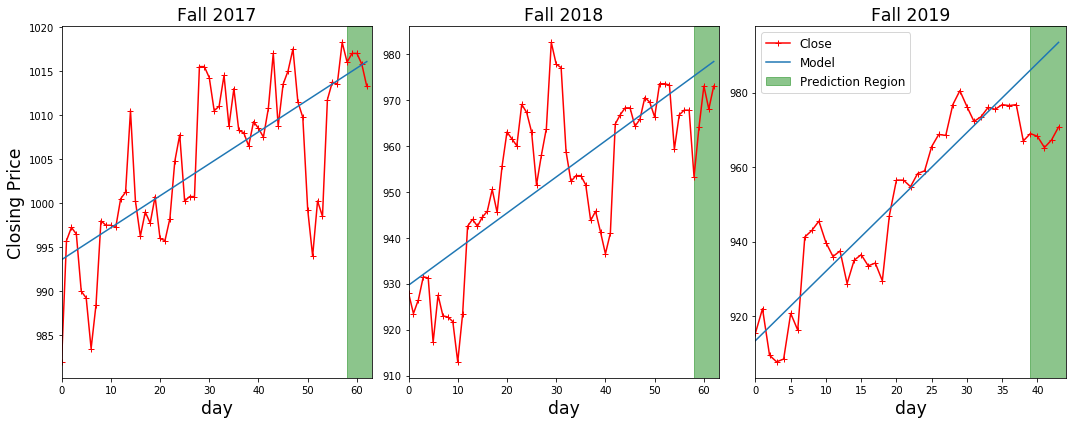

In [180]:
fig, axs = plt.subplots(1,3, tight_layout=True, figsize = (15,6))

linearModel = LinearRegression()

n = july2017.shape[0]-5
ypred = linearModel.fit(np.arange(n).reshape(-1,1),july2017['Close'][:n].values).predict(np.arange(n).reshape(-1,1))
trnerror = metric.mean_squared_error(july2017['Close'][:n],ypred)
ypred = linearModel.predict(np.arange(n,july2017.shape[0]).reshape(-1,1))
valerror = metric.mean_squared_error(july2017['Close'][n:],ypred)
print('2017 - trnerror: ', trnerror, ' tsterror: ',valerror)
h = axs[0].plot(np.arange(july2017.shape[0]),july2017['Close'], color='r', marker='+', label='Close')
coef = linearModel.coef_
intercept = linearModel.intercept_
y = coef*np.arange(july2017.shape[0]) + intercept
h = axs[0].plot(np.arange(july2017.shape[0]),y,label='Model')
h = axs[0].axvspan(n, n+5, alpha=0.45, color='g',label='Prediction')
h = axs[0].set_xlim([0,n+5])
h = axs[0].set_title('Fall 2017',fontsize = 'xx-large')
h = axs[0].set_xlabel('day',fontsize = 'xx-large')
h = axs[0].set_ylabel('Closing Price',fontsize = 'xx-large')

n = july2018.shape[0]-5
ypred = linearModel.fit(np.arange(n).reshape(-1,1),july2018['Close'][:n].values).predict(np.arange(n).reshape(-1,1))
trnerror = metric.mean_squared_error(july2018['Close'][:n],ypred)
ypred = linearModel.predict(np.arange(n,july2018.shape[0]).reshape(-1,1))
valerror = metric.mean_squared_error(july2018['Close'][n:],ypred)
print('2018 - trnerror: ', trnerror, ' tsterror: ',valerror)
h = axs[1].plot(np.arange(july2018.shape[0]),july2018['Close'], color='r', marker='+', label='Close')
coef = linearModel.coef_
intercept = linearModel.intercept_
y = coef*np.arange(july2018.shape[0]) + intercept
h = axs[1].plot(np.arange(july2018.shape[0]),y,label='Model')
h = axs[1].axvspan(n, n+5, alpha=0.45, color='g',label='Prediction')
h = axs[1].set_xlim([0,n+5])
h = axs[1].set_title('Fall 2018',fontsize = 'xx-large')
h = axs[1].set_xlabel('day',fontsize = 'xx-large')

n = july2019.shape[0]-5
ypred = linearModel.fit(np.arange(n).reshape(-1,1),july2019['Close'][:n].values).predict(np.arange(n).reshape(-1,1))
trnerror = metric.mean_squared_error(july2019['Close'][:n],ypred)
ypred = linearModel.predict(np.arange(n,july2019.shape[0]).reshape(-1,1))
valerror = metric.mean_squared_error(july2019['Close'][n:],ypred)
print('2019 - trnerror: ', trnerror, ' tsterror: ',valerror)
h = axs[2].plot(np.arange(july2019.shape[0]),july2019['Close'], color='r', marker='+', label='Close')
coef = linearModel.coef_
intercept = linearModel.intercept_
y = coef*np.arange(july2019.shape[0]) + intercept
h = axs[2].plot(np.arange(july2019.shape[0]),y,label='Model')
h = axs[2].axvspan(n, n+5, alpha=0.45, color='g',label='Prediction Region')
h = axs[2].set_xlim([0,n+5])
h = axs[2].legend(fontsize = 'large')
h = axs[2].set_title('Fall 2019',fontsize = 'xx-large')
h = axs[2].set_xlabel('day',fontsize = 'xx-large')

### Take 5 days average and the rest of the feature

In [181]:
n = july2017.shape[0]
july2017_X = [[july2017.loc[i-4,'Close'],july2017.loc[i-3,'Close'],july2017.loc[i-2,'Close'],july2017.loc[i-1,'Close'],july2017.loc[i,'Close']] for i in range(4,n-5)]
july2017_X = pd.DataFrame([np.mean(i) for i in july2017_X],columns=['avg5_Close'])     
july2017_X = pd.concat([july2017_X,july2017.loc[4:n-5-1,'Likes':].reset_index(drop=True)],axis=1)
july2017_X = normalize(np.array(july2017_X))
july2017_y = {}
for i in range(5):
    july2017_y[i] = np.array([july2017.loc[j,'Close'] for j in range(5+i,n-5+i+1)])

print('2017 Data - X: ',july2017_X.shape, ' y: ', len(july2017_y[0]))

n = july2018.shape[0]
july2018_X = [[july2018.loc[i-4,'Close'],july2018.loc[i-3,'Close'],july2018.loc[i-2,'Close'],july2018.loc[i-1,'Close'],july2018.loc[i,'Close']] for i in range(4,n-5)]
july2018_X = pd.DataFrame([np.mean(i) for i in july2018_X],columns=['avg5_Close'])     
july2018_X = pd.concat([july2018_X,july2018.loc[4:n-5-1,'Likes':].reset_index(drop=True)],axis=1)
july2018_X = normalize(np.array(july2018_X))
july2018_y = {}
for i in range(5):
    july2018_y[i] = np.array([july2018.loc[j,'Close'] for j in range(5+i,n-5+i+1)])

print('2018 Data - X: ',july2018_X.shape, ' y: ', len(july2018_y[0]))

n = july2019.shape[0]
july2019_X = [[july2019.loc[i-4,'Close'],july2019.loc[i-3,'Close'],july2019.loc[i-2,'Close'],july2019.loc[i-1,'Close'],july2019.loc[i,'Close']] for i in range(4,n-5)]
july2019_X = pd.DataFrame([np.mean(i) for i in july2019_X],columns=['avg5_Close'])     
july2019_X = pd.concat([july2019_X,july2019.loc[4:n-5-1,'Likes':].reset_index(drop=True)],axis=1)
july2019_X = normalize(np.array(july2019_X))
july2019_y = {}
for i in range(5):
    july2019_y[i] = np.array([july2019.loc[j,'Close'] for j in range(5+i,n-5+i+1)])

print('2019 Data - X: ',july2019_X.shape, ' y: ', len(july2019_y[0]))


2017 Data - X:  (54, 14)  y:  54
2018 Data - X:  (54, 14)  y:  54
2019 Data - X:  (35, 14)  y:  35


### Let's see if using all features can make a better prediction via linear regression

2017 - trnerror:  [14.96177233 15.45207123 18.57311529 18.51797022 17.58939657]  tsterror:  106.37058118166286
2018 - trnerror:  [28.89519729 55.0902048  66.41571362 77.47216005 82.48670247]  tsterror:  70.98816695881065
2019 - trnerror:  [25.94850101 29.21058256 12.0365978  10.48270404 22.13468367]  tsterror:  17.36992785291524


64.9095586644629

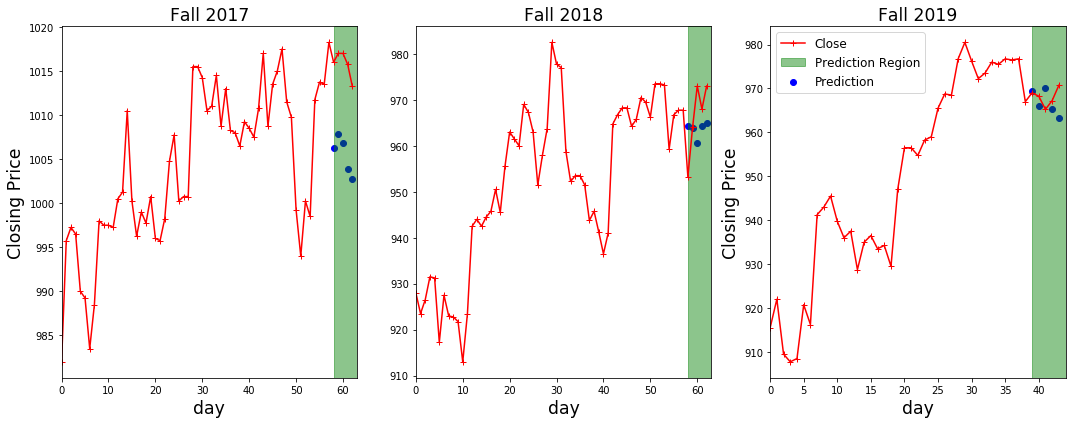

In [185]:
fig, axs = plt.subplots(1,3, tight_layout=True, figsize = (15,6))

linearModel = LinearRegression()

true_prediction = []
pred_prediction = []

# 2017
n = july2017_X.shape[0]
trnerror = np.zeros((5,))
tsterror_array = np.zeros((5,))
ypred_test = np.zeros((5,))
for i in range(5):
    ypred = linearModel.fit(july2017_X[:n-1,:],july2017_y[i][:n-1]).predict(july2017_X[:n-1,:])
    trnerror[i] = metric.mean_squared_error(july2017_y[i][:n-1],ypred)
    ypred_test[i] = linearModel.predict(july2017_X[n-1,:].reshape(1, -1))
    tsterror_array[i] = (ypred_test[i]-july2017_y[i][n-1])**2
    true_prediction.append(july2017_y[i][n-1])
    pred_prediction.append(ypred_test[i])
tsterror = np.mean(tsterror_array)
print('2017 - trnerror: ',trnerror, ' tsterror: ',tsterror)
h = axs[0].plot(np.arange(july2017.shape[0]),july2017['Close'], color='r', marker='+', label='Close')
h = axs[0].axvspan(n+4, n+9, alpha=0.45, color='g',label='Prediction')
h = axs[0].set_xlim([0,n+9])
h = axs[0].scatter(np.arange(n+4,n+9),ypred_test, color='b')
h = axs[0].set_title('Fall 2017',fontsize = 'xx-large')
h = axs[0].set_xlabel('day',fontsize = 'xx-large')
h = axs[0].set_ylabel('Closing Price',fontsize = 'xx-large')

# 2018
n = july2018_X.shape[0]
trnerror = np.zeros((5,))
tsterror_array = np.zeros((5,))
ypred_test = np.zeros((5,))
for i in range(5):
    ypred = linearModel.fit(july2018_X[:n-1,:],july2018_y[i][:n-1]).predict(july2018_X[:n-1,:])
    trnerror[i] = metric.mean_squared_error(july2018_y[i][:n-1],ypred)
    ypred_test[i] = linearModel.predict(july2018_X[n-1,:].reshape(1, -1))
    tsterror_array[i] = (ypred_test[i]-july2018_y[i][n-1])**2
    true_prediction.append(july2018_y[i][n-1])
    pred_prediction.append(ypred_test[i])
tsterror = np.mean(tsterror_array)
print('2018 - trnerror: ',trnerror, ' tsterror: ',tsterror)
h = axs[1].plot(np.arange(july2018.shape[0]),july2018['Close'], color='r', marker='+', label='Close')
h = axs[1].axvspan(n+4, n+9, alpha=0.45, color='g',label='Prediction')
h = axs[1].set_xlim([0,n+9])
h = axs[1].scatter(np.arange(n+4,n+9),ypred_test, color='b')
h = axs[1].set_title('Fall 2018',fontsize = 'xx-large')
h = axs[1].set_xlabel('day',fontsize = 'xx-large')

# 2019
n = july2019_X.shape[0]
trnerror = np.zeros((5,))
tsterror_array = np.zeros((5,))
ypred_test = np.zeros((5,))
for i in range(5):
    ypred = linearModel.fit(july2019_X[:n-1,:],july2019_y[i][:n-1]).predict(july2019_X[:n-1,:])
    trnerror[i] = metric.mean_squared_error(july2019_y[i][:n-1],ypred)
    ypred_test[i] = linearModel.predict(july2019_X[n-1,:].reshape(1, -1))
    tsterror_array[i] = (ypred_test[i]-july2019_y[i][n-1])**2
    true_prediction.append(july2019_y[i][n-1])
    pred_prediction.append(ypred_test[i])
tsterror = np.mean(tsterror_array)
print('2019 - trnerror: ',trnerror, ' tsterror: ',tsterror)
h = axs[2].plot(np.arange(july2019.shape[0]),july2019['Close'], color='r', marker='+', label='Close')
h = axs[2].axvspan(n+4, n+9, alpha=0.45, color='g',label='Prediction Region')
h = axs[2].set_xlim([0,n+9])
h = axs[2].scatter(np.arange(n+4,n+9),ypred_test, color='b',label='Prediction')
h = axs[2].set_title('Fall 2019',fontsize = 'xx-large')
h = axs[2].set_xlabel('day',fontsize = 'xx-large')
h = axs[2].set_ylabel('Closing Price',fontsize = 'xx-large')
h = axs[2].legend(fontsize = 'large')

metric.mean_squared_error(true_prediction,pred_prediction)

In [279]:
linearModel.coef_

array([ 9.92614710e+00,  3.69493295e+00, -8.55345136e-01,  3.50629258e-01,
        4.31745230e+00, -1.65427515e+00,  5.54010286e+00,  3.64359075e+00,
        1.68753900e-14, -9.76996262e-15,  4.48807683e+00, -6.51458067e+00,
       -9.45026167e-01, -2.24290571e+00])

In [280]:
july2019.columns.values[1:]

array(['Close', 'Likes', 'Retweets', 'percent', 'None', 'D0', 'D1', 'D2',
       'D3', 'D4', 'average_sum', 'SP500Close', 'SoyBeanPrice',
       'CottonPrice'], dtype=object)

### The prediction on fall 2019 looks really good! Let's try to perform nonlinear algorithm to see if we can get a better result

In [191]:
def RBFSVR(X,y,year):
    
    # eps Parameter
    units = [i for i in range(0,10)]

    # gamma parameter
    units2 = [2**i for i in range(-15,0)]

    # C parameter
    units3 = [2**i for i in range(0,20)]

    ytest_array = []
    n = X.shape[0]
    for i in range(5):
        ytest_array.append(y[i][n-1])
    ytest_array = np.array(ytest_array)
    
    # For each y, perform RBF SVR
    trnerror = np.zeros((5,))
    ypred_test = np.zeros((5,))
    
    for i in range(5):
        Xtrain = X[:n-1,:]
        ytrain = y[i][:n-1]
        Xtest = X[n-1,:].reshape(1, -1)
        ytest = y[i][n-1]

        # Split into 5-fold for complexity tuning
        K = 5
        Xfold,yfold = kfold(Xtrain,ytrain,K)

        # For each parameter unit
        avgLrnError = np.zeros((len(units),len(units2),len(units3)))
        avgValError = np.zeros((len(units),len(units2),len(units3)))
        for idx,unit in enumerate(units): 
            for idx2,unit2 in enumerate(units2):
                for idx3,unit3 in enumerate(units3):

                    # for each fold
                    lrnError=np.zeros((K,))
                    valError=np.zeros((K,))
                    for k in range(K):
                        Xlrn,ylrn,Xval,yval=get_lrn_val(Xfold,yfold,k,K)

                        model = SVR(C=unit3,epsilon=unit,gamma=unit2,kernel='rbf')
                        ypred_lrn = model.fit(Xlrn,ylrn).predict(Xlrn)
                        lrnError[k] = metric.mean_squared_error(ylrn,ypred_lrn)

                        ypred_val = model.predict(Xval)
                        valError[k] = metric.mean_squared_error(yval,ypred_val)

                    # Find average lrn and val error
                    avgLrnError[idx,idx2,idx3] = lrnError.mean()
                    avgValError[idx,idx2,idx3] = valError.mean()

        # Find lowest validation error and its corresponding parameter
        opt_params = np.unravel_index(np.argmin(avgValError, axis=None), avgValError.shape)
        opt_unit = units[opt_params[0]]
        opt_unit2 = units2[opt_params[1]]
        opt_unit3 = units3[opt_params[2]]
        opt_val_error = np.min(avgValError)
        print('eps:',opt_unit,'g:',opt_unit2,'C:',opt_unit3)

        # Train using all training data on the optimal unit
        opt_model = SVR(C=opt_unit3,epsilon=opt_unit,gamma=opt_unit2,kernel='rbf')
        ypred_trn = opt_model.fit(Xtrain,ytrain).predict(Xtrain)
        trnerror[i] = metric.mean_squared_error(ytrain,ypred_trn)

        # Test
        ypred_test[i] = opt_model.predict(Xtest)

    testerror = metric.mean_squared_error(ytest_array,ypred_test)
    print('%d - train error: ' % (year), trnerror, ' test error: ', testerror)

    return ypred_test

eps: 2 g: 3.0517578125e-05 C: 8192
eps: 0 g: 3.0517578125e-05 C: 4096
eps: 5 g: 3.0517578125e-05 C: 16384
eps: 6 g: 3.0517578125e-05 C: 65536
eps: 0 g: 3.0517578125e-05 C: 4096
2017 - train error:  [19.83254126 25.19293622 24.42798711 23.33278076 25.46519982]  test error:  67.8551461692035
eps: 4 g: 0.001953125 C: 512
eps: 5 g: 0.0078125 C: 128
eps: 0 g: 0.0625 C: 64
eps: 9 g: 3.0517578125e-05 C: 16384
eps: 8 g: 0.001953125 C: 8
2018 - train error:  [ 35.70389618  54.80288433  25.72754778 103.79574079 168.37917304]  test error:  98.46184032091462
eps: 4 g: 0.0001220703125 C: 8192
eps: 2 g: 0.000244140625 C: 4096
eps: 0 g: 0.001953125 C: 1024
eps: 3 g: 0.001953125 C: 2048
eps: 6 g: 3.0517578125e-05 C: 262144
2019 - train error:  [28.11357376 31.51410773 11.62829924 11.34295365 25.9750606 ]  test error:  27.19946916397554


64.50548521803123

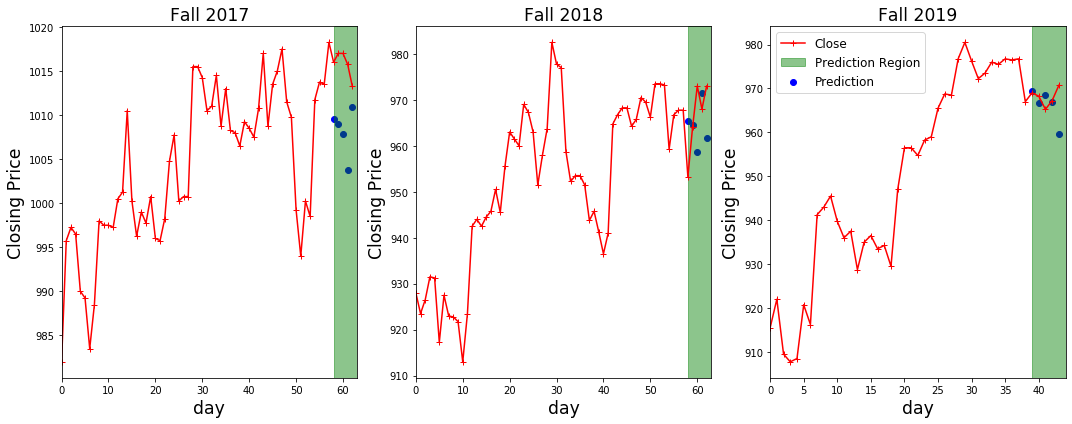

In [193]:
fig, axs = plt.subplots(1,3, tight_layout=True, figsize = (15,6))

true_prediction = []
pred_prediction = []

# 2017
ypred_test= RBFSVR(july2017_X,july2017_y,2017)
true_prediction.append(july2017['Close'][-5:])
pred_prediction.append(ypred_test)
n = july2017_X.shape[0]
h = axs[0].plot(np.arange(july2017.shape[0]),july2017['Close'], color='r', marker='+', label='Close')
h = axs[0].axvspan(n+4, n+9, alpha=0.45, color='g',label='Prediction')
h = axs[0].set_xlim([0,n+9])
h = axs[0].scatter(np.arange(n+4,n+9),ypred_test, color='b')
h = axs[0].set_title('Fall 2017',fontsize = 'xx-large')
h = axs[0].set_xlabel('day',fontsize = 'xx-large')
h = axs[0].set_ylabel('Closing Price',fontsize = 'xx-large')

# 2018
ypred_test= RBFSVR(july2018_X,july2018_y,2018)
true_prediction.append(july2018['Close'][-5:])
pred_prediction.append(ypred_test)
n = july2018_X.shape[0]
h = axs[1].plot(np.arange(july2018.shape[0]),july2018['Close'], color='r', marker='+', label='Close')
h = axs[1].axvspan(n+4, n+9, alpha=0.45, color='g',label='Prediction')
h = axs[1].set_xlim([0,n+9])
h = axs[1].scatter(np.arange(n+4,n+9),ypred_test, color='b')
h = axs[1].set_title('Fall 2018',fontsize = 'xx-large')
h = axs[1].set_xlabel('day',fontsize = 'xx-large')
h = axs[1].set_ylabel('Closing Price',fontsize = 'xx-large')

# 2019
ypred_test= RBFSVR(july2019_X,july2019_y,2019)
true_prediction.append(july2019['Close'][-5:])
pred_prediction.append(ypred_test)
n = july2019_X.shape[0]
h = axs[2].plot(np.arange(july2019.shape[0]),july2019['Close'], color='r', marker='+', label='Close')
h = axs[2].axvspan(n+4, n+9, alpha=0.45, color='g',label='Prediction Region')
h = axs[2].set_xlim([0,n+9])
h = axs[2].scatter(np.arange(n+4,n+9),ypred_test, color='b',label='Prediction')
h = axs[2].set_title('Fall 2019',fontsize = 'xx-large')
h = axs[2].set_xlabel('day',fontsize = 'xx-large')
h = axs[2].set_ylabel('Closing Price',fontsize = 'xx-large')
h = axs[2].legend(fontsize = 'large')

metric.mean_squared_error(true_prediction,pred_prediction)

In [187]:
july2017['Close'][-5:]

58    1016.00
59    1017.00
60    1017.00
61    1015.75
62    1013.25
Name: Close, dtype: float64

### The result doesn't seem to be better than the linear case. I suspect is the issue with cross validation. Instead, let's each fall dataset as a fold and perform optimal complexity tuning using all folds.

opt eps: 0 opt g: 3.0517578125e-05 opt C: 131072      optValError: 69.01673515894358
opt eps: 0 opt g: 0.00390625 opt C: 8192      optValError: 35.31371430132861
opt eps: 5 opt g: 0.000244140625 opt C: 524288      optValError: 48.917241576072875
opt eps: 4 opt g: 0.000244140625 opt C: 131072      optValError: 60.133270686632386
opt eps: 0 opt g: 0.015625 opt C: 64      optValError: 37.553871041584735
2019 - train error:  [39.26029448 19.9779006  16.40954965 11.02226968 21.10353568]  test error:  14.593486437795056


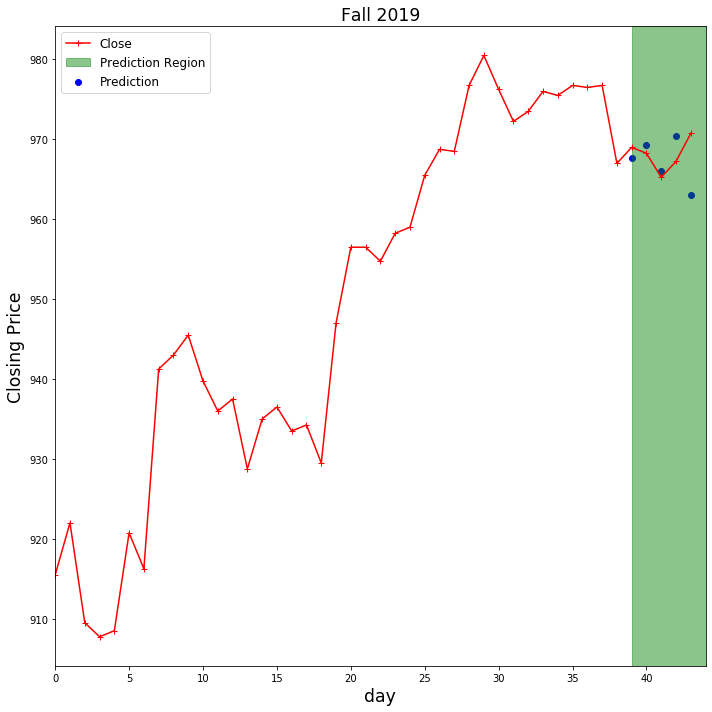

In [299]:
# eps Parameter
units = [i for i in range(0,10)]

# gamma parameter
units2 = [2**i for i in range(-15,0)]

# C parameter
units3 = [2**i for i in range(0,20)]

ytest_array = []
for i in range(5):
    ytest_array.append(july2019_y[i][n-1])
ytest_array = np.array(ytest_array)

# For each y, perform RBF SVR
n = july2019_X.shape[0]
trnerror = np.zeros((5,))
ypred_test = np.zeros((5,))

for i in range(5):
    Xtrain = july2019_X[:n-1,:]
    ytrain = july2019_y[i][:n-1]
    Xtest = july2019_X[n-1,:].reshape(1, -1)
    ytest = july2019_y[i][n-1]

    # For each parameter unit
    avgLrnError = np.zeros((len(units),len(units2),len(units3)))
    avgValError = np.zeros((len(units),len(units2),len(units3)))
    for idx,unit in enumerate(units): 
        for idx2,unit2 in enumerate(units2):
            for idx3,unit3 in enumerate(units3):

                lrnError = np.zeros((3,))
                valError = np.zeros((3,))
                
                # for fold 1 (using july2017)
                n = july2017_X.shape[0]
                Xlrn = july2017_X[:n-5,:]
                ylrn = july2017_y[i][:n-5]
                Xval = july2017_X[n-5:n,:]
                yval = july2017_y[i][n-5:n]
                
                model = SVR(C=unit3,epsilon=unit,gamma=unit2,kernel='rbf')
                ypred_lrn = model.fit(Xlrn,ylrn).predict(Xlrn)
                lrnError[0] = metric.mean_squared_error(ylrn,ypred_lrn)
                ypred_val = model.predict(Xval)
                valError[0] = metric.mean_squared_error(yval,ypred_val)

                # for fold 2 (using july2018)
                n = july2018_X.shape[0]
                Xlrn = july2018_X[:n-5,:]
                ylrn = july2018_y[i][:n-5]
                Xval = july2018_X[n-5:n,:]
                yval = july2018_y[i][n-5:n]
                
                model = SVR(C=unit3,epsilon=unit,gamma=unit2,kernel='rbf')
                ypred_lrn = model.fit(Xlrn,ylrn).predict(Xlrn)
                lrnError[1] = metric.mean_squared_error(ylrn,ypred_lrn)
                ypred_val = model.predict(Xval)
                valError[1] = metric.mean_squared_error(yval,ypred_val)
                
                # for fold 3 (using july2019)
                n = Xtrain.shape[0]
                Xlrn = Xtrain[:n-5,:]
                ylrn = ytrain[:n-5]
                Xval = Xtrain[n-5:n,:]
                yval = ytrain[n-5:n]
                
                model = SVR(C=unit3,epsilon=unit,gamma=unit2,kernel='rbf')
                ypred_lrn = model.fit(Xlrn,ylrn).predict(Xlrn)
                lrnError[2] = metric.mean_squared_error(ylrn,ypred_lrn)
                ypred_val = model.predict(Xval)
                valError[2] = metric.mean_squared_error(yval,ypred_val)
                
                # Find average lrn and val error
                avgLrnError[idx,idx2,idx3] = lrnError.mean()
                avgValError[idx,idx2,idx3] = valError.mean()

    # Find lowest validation error and its corresponding parameter
    opt_params = np.unravel_index(np.argmin(avgValError, axis=None), avgValError.shape)
    opt_unit = units[opt_params[0]]
    opt_unit2 = units2[opt_params[1]]
    opt_unit3 = units3[opt_params[2]]
    opt_val_error = np.min(avgValError)
    print('opt eps:',opt_unit,'opt g:',opt_unit2,'opt C:',opt_unit3,'     optValError:',opt_val_error)

    # Train using all training data on the optimal unit
    opt_model = SVR(C=opt_unit3,epsilon=opt_unit,gamma=opt_unit2,kernel='rbf')
    ypred_trn = opt_model.fit(Xtrain,ytrain).predict(Xtrain)
    trnerror[i] = metric.mean_squared_error(ytrain,ypred_trn)

    # Test
    ypred_test[i] = opt_model.predict(Xtest)

testerror = metric.mean_squared_error(ytest_array,ypred_test)
print('2019 - train error: ', trnerror, ' test error: ', testerror)

# plot
fig, axs = plt.subplots(1,1, tight_layout=True, figsize = (10,10))
n = july2019_X.shape[0]
h = axs.plot(np.arange(july2019.shape[0]),july2019['Close'], color='r', marker='+', label='Close')
h = axs.axvspan(n+4, n+9, alpha=0.45, color='g',label='Prediction Region')
h = axs.set_xlim([0,n+9])
h = axs.scatter(np.arange(n+4,n+9),ypred_test, color='b',label='Prediction')
h = axs.set_title('Fall 2019',fontsize = 'xx-large')
h = axs.set_xlabel('day',fontsize = 'xx-large')
h = axs.set_ylabel('Closing Price',fontsize = 'xx-large')
h = axs.legend(fontsize = 'large')

In [308]:
july2019_X.shape

(35, 14)

In [302]:
july2019_X[n-1,:].reshape(1, -1)

array([[ 1.2183564 , -0.05365913,  0.37412271, -0.17149859,  1.30474323,
        -1.78698419, -1.29275611, -1.33602163,  0.        ,  0.        ,
         2.11333388,  1.3595818 ,  0.52480171,  1.54587742]])

### The result is almost twice better than the previous case! Finally, using the current model to predict Nov 4th - Nov 8th

In [195]:
### New july2019 data

n = july2017.shape[0]
july2017_X = [[july2017.loc[i-4,'Close'],july2017.loc[i-3,'Close'],july2017.loc[i-2,'Close'],july2017.loc[i-1,'Close'],july2017.loc[i,'Close']] for i in range(4,n-5)]
july2017_X = pd.DataFrame([np.mean(i) for i in july2017_X],columns=['avg5_Close'])     
july2017_X_raw = pd.concat([july2017_X,july2017.loc[4:n-5-1,'Likes':].reset_index(drop=True)],axis=1)
#july2017_X = normalize(np.array(july2017_X))
july2017_y = {}
for i in range(5):
    july2017_y[i] = np.array([july2017.loc[j,'Close'] for j in range(5+i,n-5+i+1)])

print('2017 Data - X: ',july2017_X.shape, ' y: ', len(july2017_y[0]))

n = july2018.shape[0]
july2018_X = [[july2018.loc[i-4,'Close'],july2018.loc[i-3,'Close'],july2018.loc[i-2,'Close'],july2018.loc[i-1,'Close'],july2018.loc[i,'Close']] for i in range(4,n-5)]
july2018_X = pd.DataFrame([np.mean(i) for i in july2018_X],columns=['avg5_Close'])     
july2018_X_raw = pd.concat([july2018_X,july2018.loc[4:n-5-1,'Likes':].reset_index(drop=True)],axis=1)
#july2018_X = normalize(np.array(july2018_X))
july2018_y = {}
for i in range(5):
    july2018_y[i] = np.array([july2018.loc[j,'Close'] for j in range(5+i,n-5+i+1)])

print('2018 Data - X: ',july2018_X.shape, ' y: ', len(july2018_y[0]))

n = july2019.shape[0]
july2019_X = {}
july2018_X = {}
july2017_X = {}
for j in range(5):
    july2019_X[j] = [[july2019.loc[i-4,'Close'],july2019.loc[i-3,'Close'],july2019.loc[i-2,'Close'],july2019.loc[i-1,'Close'],july2019.loc[i,'Close']] for i in range(4,n-(j))]
    july2019_X[j] = pd.DataFrame([np.mean(i) for i in july2019_X[j]],columns=['avg5_Close'])     
    july2019_X[j] = pd.concat([july2019_X[j],july2019.loc[4:n-(j+1),'Likes':].reset_index(drop=True)],axis=1)
#    july2019_X[j] = normalize(np.array(july2019_X[j]))
    temp = np.concatenate((july2017_X_raw,july2018_X_raw,np.array(july2019_X[j])),axis=0)
    mean = temp.mean(axis=0)
    sd = temp.std(axis=0)
    july2017_X[j] = np.array((july2017_X_raw-mean)/sd)
    july2018_X[j] = np.array((july2018_X_raw-mean)/sd)
    july2019_X[j] = np.array((july2019_X[j]-mean)/sd)
    
    
july2019_y = {}
for i in range(5):
    july2019_y[i] = np.array([july2019.loc[j,'Close'] for j in range(5+i,n)])

print('2019 Data: ')
print('0 - X: ',len(july2019_X[0]), ' y: ', len(july2019_y[0]))
print('1 - X: ',len(july2019_X[1]), ' y: ', len(july2019_y[1]))
print('2 - X: ',len(july2019_X[2]), ' y: ', len(july2019_y[2]))
print('3 - X: ',len(july2019_X[3]), ' y: ', len(july2019_y[3]))
print('4 - X: ',len(july2019_X[4]), ' y: ', len(july2019_y[4]))

2017 Data - X:  (54, 1)  y:  54
2018 Data - X:  (54, 1)  y:  54
2019 Data: 
0 - X:  40  y:  39
1 - X:  39  y:  38
2 - X:  38  y:  37
3 - X:  37  y:  36
4 - X:  36  y:  35


opt eps: 8 opt g: 0.5 opt C: 8      optValError: 6.121290587397478
opt eps: 9 opt g: 0.015625 opt C: 32      optValError: 5.675199611572597
opt eps: 0 opt g: 3.0517578125e-05 opt C: 8192      optValError: 5.360184018220927
opt eps: 0 opt g: 0.03125 opt C: 512      optValError: 5.527972598340436
opt eps: 1 opt g: 0.0009765625 opt C: 65536      optValError: 4.948458536847504


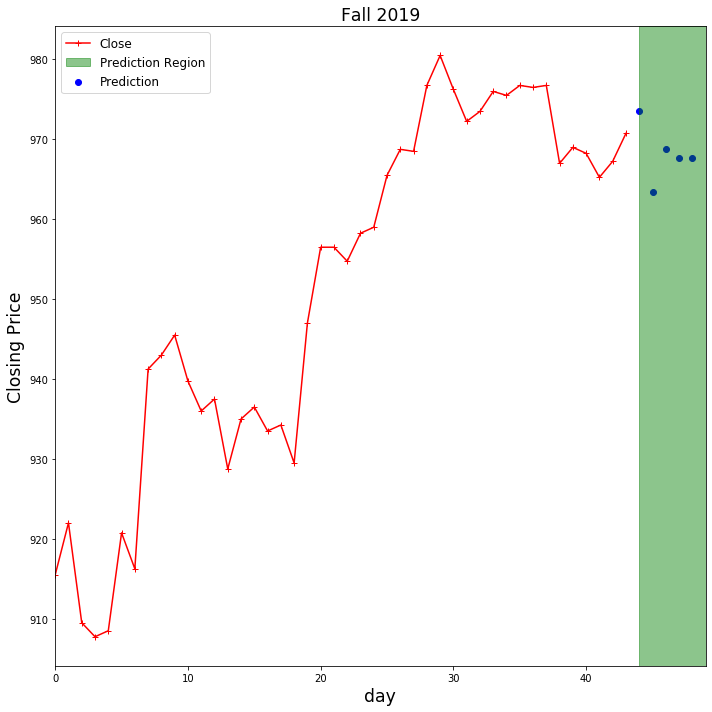

In [197]:
# eps Parameter
units = [i for i in range(0,10)]

# gamma parameter
units2 = [2**i for i in range(-15,0)]

# C parameter
units3 = [2**i for i in range(0,25)]

# For each y, perform RBF SVR
trnerror = np.zeros((5,))
ypred_test = np.zeros((5,))

for i in range(5):
    n = july2019_X[i].shape[0]
    Xtrain = july2019_X[i][:n-1,:]
    ytrain = july2019_y[i]
    Xtest = july2019_X[i][n-1,:].reshape(1, -1)

    # For each parameter unit
    avgLrnError = np.zeros((len(units),len(units2),len(units3)))
    avgValError = np.zeros((len(units),len(units2),len(units3)))
    for idx,unit in enumerate(units): 
        for idx2,unit2 in enumerate(units2):
            for idx3,unit3 in enumerate(units3):

                lrnError = np.zeros((3,))
                valError = np.zeros((3,))
                
                # for fold 1 (using july2017)
                n = july2017_X[i].shape[0]
                Xlrn = july2017_X[i][:n-5,:]
                ylrn = july2017_y[i][:n-5]
                Xval = july2017_X[i][n-5:n,:]
                yval = july2017_y[i][n-5:n]
                
                model = SVR(C=unit3,epsilon=unit,gamma=unit2,kernel='rbf')
                ypred_lrn = model.fit(Xlrn,ylrn).predict(Xlrn)
                lrnError[0] = metric.mean_absolute_error(ylrn,ypred_lrn)
                ypred_val = model.predict(Xval)
                valError[0] = metric.mean_absolute_error(yval,ypred_val)

                # for fold 2 (using july2018)
                n = july2018_X[i].shape[0]
                Xlrn = july2018_X[i][:n-5,:]
                ylrn = july2018_y[i][:n-5]
                Xval = july2018_X[i][n-5:n,:]
                yval = july2018_y[i][n-5:n]
                
                model = SVR(C=unit3,epsilon=unit,gamma=unit2,kernel='rbf')
                ypred_lrn = model.fit(Xlrn,ylrn).predict(Xlrn)
                lrnError[1] = metric.mean_absolute_error(ylrn,ypred_lrn)
                ypred_val = model.predict(Xval)
                valError[1] = metric.mean_absolute_error(yval,ypred_val)
                
                # for fold 3 (using july2019)
                n = Xtrain.shape[0]
                Xlrn = Xtrain[:n-5,:]
                ylrn = ytrain[:n-5]
                Xval = Xtrain[n-5:n,:]
                yval = ytrain[n-5:n]
                
                model = SVR(C=unit3,epsilon=unit,gamma=unit2,kernel='rbf')
                ypred_lrn = model.fit(Xlrn,ylrn).predict(Xlrn)
                lrnError[2] = metric.mean_absolute_error(ylrn,ypred_lrn)
                ypred_val = model.predict(Xval)
                valError[2] = metric.mean_absolute_error(yval,ypred_val)
                
                # Find average lrn and val error
                avgLrnError[idx,idx2,idx3] = lrnError.mean()
                avgValError[idx,idx2,idx3] = valError.mean()

    # Find lowest validation error and its corresponding parameter
    opt_params = np.unravel_index(np.argmin(avgValError, axis=None), avgValError.shape)
    opt_unit = units[opt_params[0]]
    opt_unit2 = units2[opt_params[1]]
    opt_unit3 = units3[opt_params[2]]
    opt_val_error = np.min(avgValError)
    print('opt eps:',opt_unit,'opt g:',opt_unit2,'opt C:',opt_unit3,'     optValError:',opt_val_error)

    # Train using all training data on the optimal unit
    opt_model = SVR(C=opt_unit3,epsilon=opt_unit,gamma=opt_unit2,kernel='rbf')
    XtrainAll = np.concatenate((july2017_X[i],july2018_X[i],Xtrain),axis=0)
    ytrainAll = np.concatenate((july2017_y[i],july2018_y[i],ytrain))
    ypred_trn = opt_model.fit(XtrainAll,ytrainAll).predict(XtrainAll)
    trnerror[i] = metric.mean_absolute_error(ytrainAll,ypred_trn)

    # Test
    ypred_test[i] = opt_model.predict(Xtest)

# plot
fig, axs = plt.subplots(1,1, tight_layout=True, figsize = (10,10))
n = july2019.shape[0]
h = axs.plot(np.arange(july2019.shape[0]),july2019['Close'], color='r', marker='+', label='Close')
h = axs.axvspan(n, n+5, alpha=0.45, color='g',label='Prediction Region')
h = axs.set_xlim([0,n+5])
h = axs.scatter(np.arange(n,n+5),ypred_test, color='b',label='Prediction')
h = axs.set_title('Fall 2019',fontsize = 'xx-large')
h = axs.set_xlabel('day',fontsize = 'xx-large')
h = axs.set_ylabel('Closing Price',fontsize = 'xx-large')
h = axs.legend(fontsize = 'large')

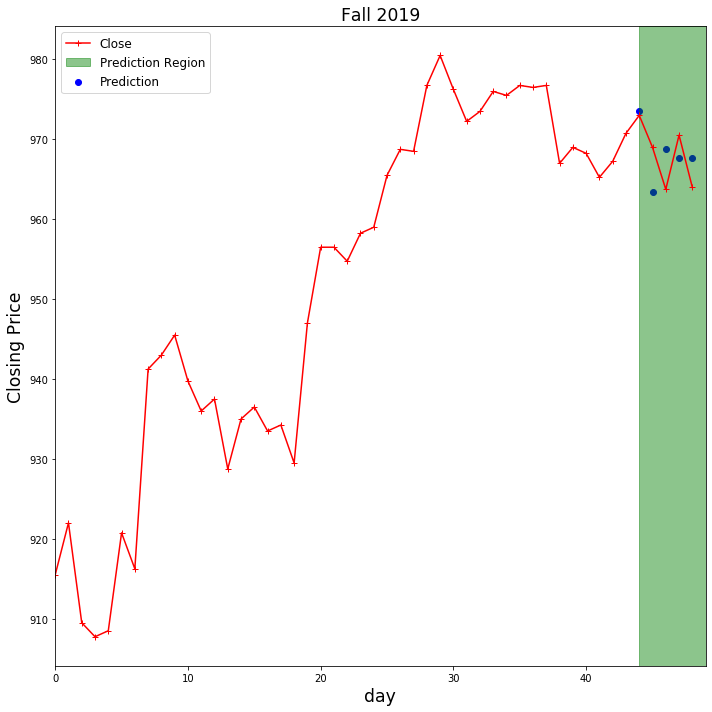

In [198]:
# plot new prediction
july_true = pd.DataFrame([973,969,963.75,970.53,964],columns=[0])
fig, axs = plt.subplots(1,1, tight_layout=True, figsize = (10,10))
n = july2019.shape[0]
h = axs.plot(np.arange(july2019.shape[0]+5),pd.concat([july2019['Close'],july_true],axis=0), color='r', marker='+', label='Close')
h = axs.axvspan(n, n+5, alpha=0.45, color='g',label='Prediction Region')
h = axs.set_xlim([0,n+5])
h = axs.scatter(np.arange(n,n+5),ypred_test, color='b',label='Prediction')
h = axs.set_title('Fall 2019',fontsize = 'xx-large')
h = axs.set_xlabel('day',fontsize = 'xx-large')
h = axs.set_ylabel('Closing Price',fontsize = 'xx-large')
h = axs.legend(fontsize = 'large')

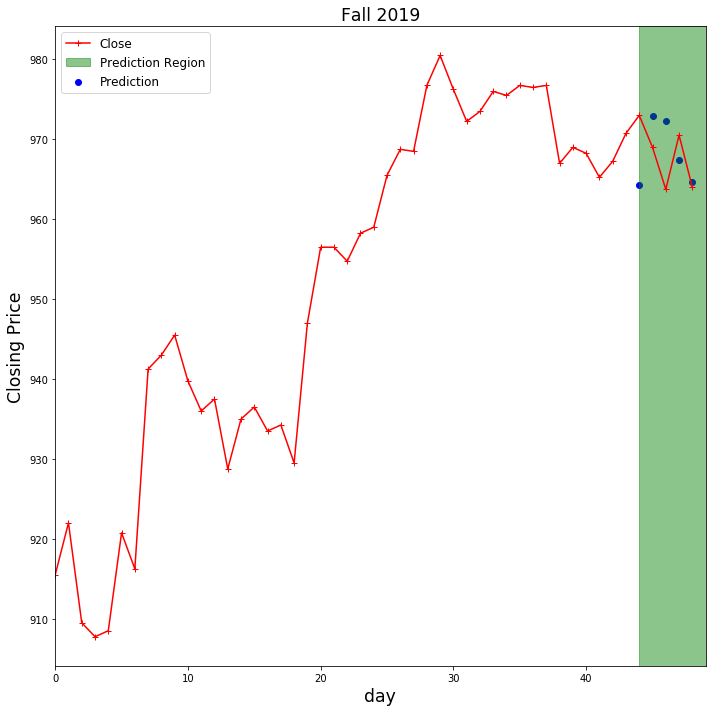

In [160]:
# plot new prediction
july_true = pd.DataFrame([973,969,963.75,970.53,964],columns=[0])
july_pred = [964.32086872, 972.86304682, 972.25765581, 967.37002977, 964.63784106]
fig, axs = plt.subplots(1,1, tight_layout=True, figsize = (10,10))
n = july2019.shape[0]
h = axs.plot(np.arange(july2019.shape[0]+5),pd.concat([july2019['Close'],july_true],axis=0), color='r', marker='+', label='Close')
h = axs.axvspan(n, n+5, alpha=0.45, color='g',label='Prediction Region')
h = axs.set_xlim([0,n+5])
h = axs.scatter(np.arange(n,n+5),july_pred, color='b',label='Prediction')
h = axs.set_title('Fall 2019',fontsize = 'xx-large')
h = axs.set_xlabel('day',fontsize = 'xx-large')
h = axs.set_ylabel('Closing Price',fontsize = 'xx-large')
h = axs.legend(fontsize = 'large')

### Let's find the prediction price for march and may

In [90]:
mu_march = 14.704637
sd_march = 4.1209
mu_may = 7.6386
sd_may = 2.24839

ypred_july = ypred_test
ypred_march = ypred_july - mu_march
ypred_may = ypred_july - mu_may

print('July Prediction: ', ypred_july)
print('May Prediction: ', ypred_may)
print('March Prediction: ', ypred_march)


July Prediction:  [971.35802952 967.89122603 968.8088207  969.60253374 967.30902381]
May Prediction:  [963.71942952 960.25262603 961.1702207  961.96393374 959.67042381]
March Prediction:  [956.65339252 953.18658903 954.1041837  954.89789674 952.60438681]


In [3]:
march_pred = [949.6,958.2,957.6,952.7,949.9]
march_true = [951.25,947,941.25,948.5,942.25]
may_pred = [956.68226872, 965.22444682, 964.61905581, 959.73142977, 956.99924106]
may_true = [963,958.5,953,960,953.75]
july_pred = [964.32086872, 972.86304682, 972.25765581, 967.37002977, 964.63784106]
july_true = [973,969,963.75,970.53,964]

pred =  [949.6,958.2,957.6,952.7,949.9,956.68226872, 965.22444682, 964.61905581, 959.73142977, 956.99924106,964.32086872, 972.86304682, 972.25765581, 967.37002977, 964.63784106]
true = [951.25,947,941.25,948.5,942.25,963,958.5,953,960,953.75,973,969,963.75,970.53,964]

import sklearn.metrics as metric

metric.mean_squared_error(true,pred)



58.36229865828981

MSE Error:  8.265389177964396


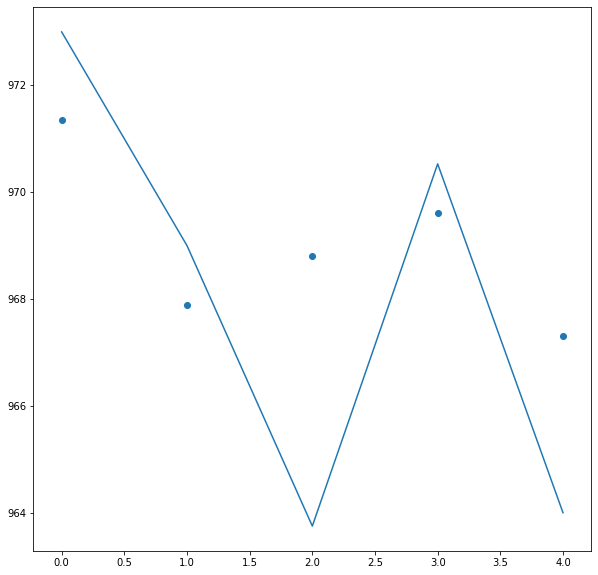

In [89]:
print('MSE Error: ', metric.mean_squared_error(july_true,ypred_test))
figure = plt.figure(figsize=(10,10))
plt.plot([0,1,2,3,4],july_true)
plt.scatter([0,1,2,3,4],ypred_test)


In [92]:
# True Prediction error
pred = [956.65339252, 953.18658903, 954.1041837,  954.89789674, 952.60438681,963.71942952, 960.25262603, 961.1702207,  961.96393374, 959.67042381,971.35802952, 967.89122603, 968.8088207, 969.60253374, 967.30902381]
true = [951.25,947,941.25,948.5,942.25,963,958.5,953,960,953.75,973,969,963.75,970.53,964]

print('MSE Error: ', metric.mean_squared_error(true,pred))

MSE Error:  35.428277659043246
